# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080


2.65253050610122 0.46979818323153927
2.656531306261252 0.46626263101610743
2.660532106421284 0.4627196156235579
2.664532906581316 0.4591691937647434
2.668533706741348 0.4556114222690675
2.67253450690138 0.45204635808357463
2.676535307061412 0.44847405827203896
2.680536107221444 0.44489458001405074
2.684536907381476 0.44130798060410126
2.6885377075415082 0.4377143174506656
2.6925385077015402 0.4341136480752838
2.6965393078615723 0.43050603011164024
2.7005401080216043 0.426891521304641
2.7045409081816363 0.4232701795094896
2.7085417083416683 0.419642062690761
2.7125425085017003 0.4160072289214737
2.7165433086617323 0.4123657363821604
2.7205441088217643 0.4087176433599365
2.7245449089817964 0.4050630082475672
2.7285457091418284 0.4014018895425331
2.7325465093018604 0.39773434584609335
2.7365473094618924 0.3940604358623482
2.7405481096219244 0.39038021839729903
2.7445489097819564 0.38669375235790715
2.7485497099419884 0.3830010967511509
2.7525505101020205 0.37930231068308135
2.75655131026


5.493098619723945 -0.7104142843080594
5.497099419883977 -0.7075929081621123
5.501100220044009 -0.7047602060147884
5.505101020204041 -0.7019162232073964
5.509101820364073 -0.6990610052618075
5.513102620524105 -0.6961945978797266
5.517103420684137 -0.6933170469419611
5.521104220844169 -0.6904283985076866
5.525105021004201 -0.687528698813709
5.529105821164233 -0.6846179942737255
5.533106621324265 -0.6816963314775805
5.537107421484297 -0.6787637571905205
5.541108221644329 -0.6758203183524457
5.545109021804361 -0.6728660620771585
5.549109821964393 -0.6699010356516089
5.553110622124425 -0.6669252865351383
5.557111422284457 -0.6639388623587196
5.561112222444489 -0.6609418109241947
5.565113022604521 -0.6579341802035094
5.569113822764553 -0.6549160183379458
5.573114622924585 -0.651887373637351
5.577115423084617 -0.6488482945793651
5.581116223244649 -0.6457988298086439
5.585117023404681 -0.642739028136081
5.589117823564713 -0.6396689385380264
5.593118623724745 -0.6365886101555028
5.597119423884

0.9180468160937644
8.265653130626125 0.9164532677976968
8.269653930786157 0.9148450504018502
8.27365473094619 0.913222189647964
8.277655531106221 0.9115847115121654
8.281656331266253 0.9099326422045523
8.285657131426285 0.9082660081687749
8.289657931586317 0.9065848360816119
8.29365873174635 0.9048891528525435
8.297659531906382 0.9031789856233208
8.301660332066414 0.9014543617675312
8.305661132226446 0.8997153088901606
8.309661932386478 0.8979618548271512
8.31366273254651 0.8961940276449558
8.317663532706542 0.8944118556400894
8.321664332866574 0.8926153673386752
8.325665133026606 0.8908045914959887
8.329665933186638 0.888979557095997
8.33366673334667 0.8871402933508954
8.337667533506702 0.8852868297006393
8.341668333666734 0.8834191958124734
8.345669133826766 0.8815374215804563
8.349669933986798 0.8796415371249827
8.35367073414683 0.8777315727923005
8.357671534306862 0.8758075591540257
8.361672334466894 0.8738695270066531
8.365673134626926 0.8719175073710624
8.369673934786958 0.869951

10.974194838967794 -0.9997714682938424
10.978195639127826 -0.9998489950898279
10.982196439287858 -0.9999105179222855
10.98619723944789 -0.999956035806457
10.990198039607922 -0.999985548013766
10.994198839767954 -0.9999990540718289
10.998199639927986 -0.9999965537644626
11.002200440088018 -0.9999780471316879
11.00620124024805 -0.9999435344697291
11.010202040408082 -0.9998930163310089
11.014202840568114 -0.99982649352414
11.018203640728146 -0.9997439671139116
11.022204440888178 -0.9996454384212728
11.02620524104821 -0.9995309090233117
11.030206041208242 -0.9994003807532289
11.034206841368274 -0.99925385570031
11.038207641528306 -0.9990913362098905
11.042208441688338 -0.9989128248833195
11.04620924184837 -0.998718324577917
11.050210042008402 -0.9985078384069288
11.054210842168434 -0.998281369739477
11.058211642328466 -0.9980389222005049
11.062212442488498 -0.9977804996707205
11.06621324264853 -0.9975061062865328
11.070214042808562 -0.9972157464399869
11.074214842968594 -0.9969094247786929

13.594718943788758 0.8564475090776079
13.59871974394879 0.858505998795813
13.602720544108822 0.8605507469402798
13.606721344268854 0.862581720781991
13.610722144428886 0.8645988878124067
13.614722944588918 0.8666022157439834
13.61872374474895 0.8685916725106922
13.622724544908982 0.8705672262685307
13.626725345069014 0.8725288453960336
13.630726145229046 0.8744764984947787
13.634726945389078 0.8764101543898893
13.63872774554911 0.8783297821305333
13.642728545709142 0.8802353509904183
13.646729345869174 0.8821268304682842
13.650730146029206 0.8840041902883904
13.654730946189238 0.8858674004010013
13.65873174634927 0.8877164309828668
13.662732546509302 0.8895512524376996
13.666733346669334 0.8913718353966493
13.670734146829366 0.8931781507187722
13.674734946989398 0.8949701694914977
13.67873574714943 0.8967478630310913
13.682736547309462 0.8985112028831139
13.686737347469494 0.9002601608228767
13.690738147629526 0.9019947088558932
13.694738947789558 0.9037148192183275
13.69873974794959 0

-0.4997264891891043
16.23524704940988 -0.5031879066543091
16.239247849569914 -0.5066412699023818
16.243248649729946 -0.5100865236574759
16.247249449889978 -0.5135236127735485
16.25125025005001 -0.5169524822352435
16.255251050210042 -0.520373077158771
16.259251850370074 -0.5237853427927872
16.263252650530106 -0.5271892245192695
16.267253450690138 -0.5305846678543918
16.27125425085017 -0.5339716184493957
16.275255051010202 -0.5373500220914611
16.279255851170234 -0.5407198247045735
16.283256651330266 -0.5440809723503899
16.287257451490298 -0.5474334112291018
16.29125825165033 -0.5507770876802969
16.295259051810362 -0.5541119481838173
16.299259851970394 -0.5574379393606165
16.303260652130426 -0.5607550079736141
16.307261452290458 -0.5640631009285475
16.31126225245049 -0.5673621652748219
16.315263052610522 -0.5706521482063578
16.319263852770554 -0.5739329970624364
16.323264652930586 -0.5772046593285423
16.327265453090618 -0.580467082637204
16.33126625325065 -0.5837202147688326
16.3352670534

0.11398853292108763
18.967793558711744 0.11796233325209855
18.971794358871776 0.1219342454331105
18.975795159031808 0.12590420588818552
18.97979595919184 0.12987215107262573
18.983796759351872 0.1338380174739904
18.987797559511904 0.13780174161311262
18.991798359671936 0.14176326004511539
18.995799159831968 0.145722509360427
18.999799959992 0.14967942618579613
19.003800760152032 0.15363394718530624
19.007801560312064 0.1575860090613892
19.011802360472096 0.1615355485558386
19.015803160632128 0.16548250245082222
19.01980396079216 0.16942680756989392
19.023804760952192 0.17336840077900487
19.027805561112224 0.17730721898751411
19.031806361272256 0.18124319914919843
19.035807161432288 0.1851762782632614
19.03980796159232 0.18910639337534196
19.043808761752352 0.1930334815785219
19.047809561912384 0.19695748001433291
19.051810362072416 0.20087832587376267
19.055811162232448 0.20479595639826023
19.05981196239248 0.20871030888074046
19.063812762552512 0.21262132066658782
19.067813562712544 0

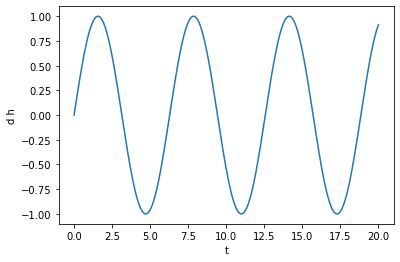

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

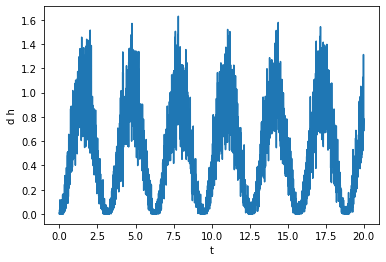

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

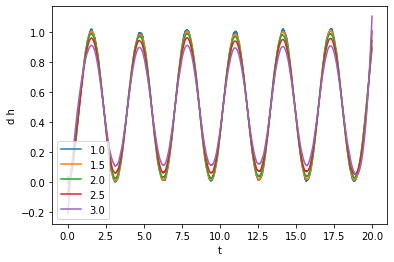

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

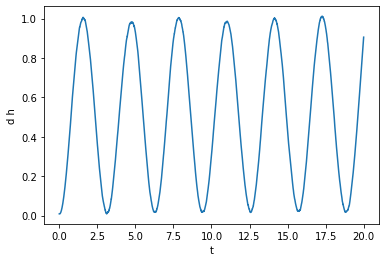

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.2026


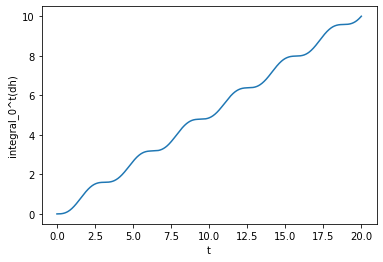

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

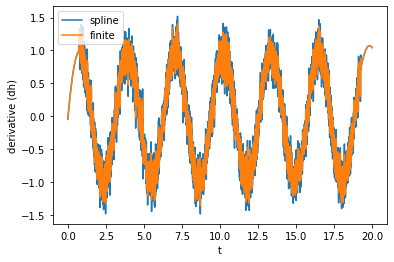

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

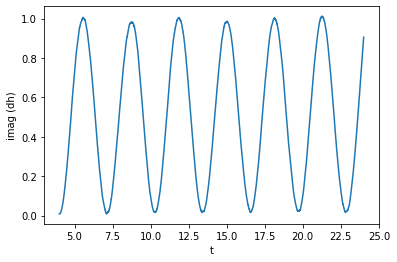

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

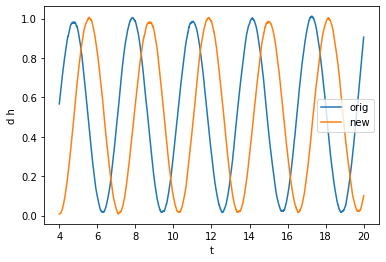

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

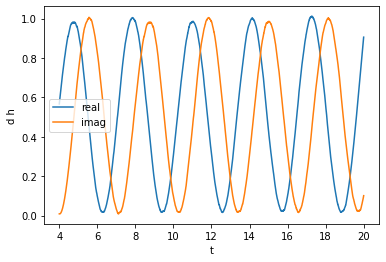

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

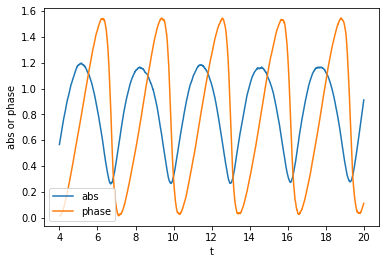

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

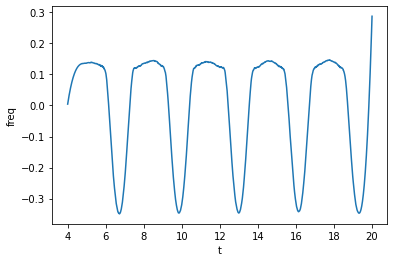

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

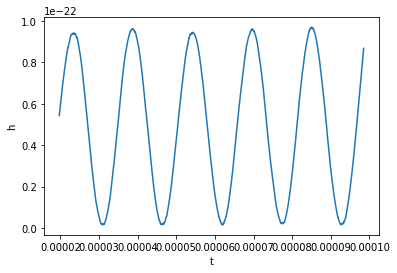

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

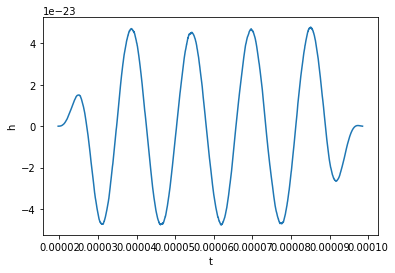

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

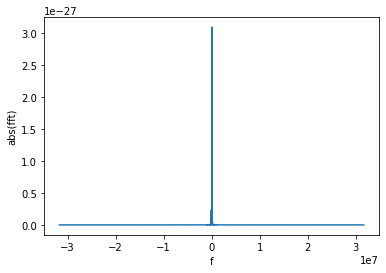

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

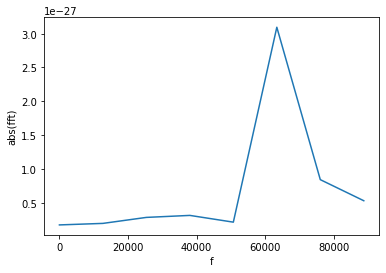

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64208.29


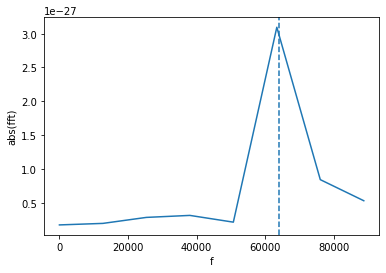

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.095e-27
Maximum with mask 8.408e-28
Length with mask 8
Length after having removed the masked points 7
